In [1]:
from siar.data.datasets import Siar, SiarDatasetConfig

dataset_config = SiarDatasetConfig(
    return_sequence=True,
    gt_target=True,
    self_target=False
)
dataset = Siar(dataset_config)
dataset[0].shape

Skipping .DS_Store


torch.Size([10, 3, 256, 256])

In [2]:
dataset.get_sequence_object(0)

Sequence(idx=0, id=1069, seq=[Item(id=8, sequence_id=1069, data='/Users/clemens/PycharmProjects/cvp2/datafiles/1069/8.png'), Item(id=9, sequence_id=1069, data='/Users/clemens/PycharmProjects/cvp2/datafiles/1069/9.png'), Item(id=10, sequence_id=1069, data='/Users/clemens/PycharmProjects/cvp2/datafiles/1069/10.png'), Item(id=4, sequence_id=1069, data='/Users/clemens/PycharmProjects/cvp2/datafiles/1069/4.png'), Item(id=5, sequence_id=1069, data='/Users/clemens/PycharmProjects/cvp2/datafiles/1069/5.png'), Item(id=7, sequence_id=1069, data='/Users/clemens/PycharmProjects/cvp2/datafiles/1069/7.png'), Item(id=6, sequence_id=1069, data='/Users/clemens/PycharmProjects/cvp2/datafiles/1069/6.png'), Item(id=2, sequence_id=1069, data='/Users/clemens/PycharmProjects/cvp2/datafiles/1069/2.png'), Item(id=3, sequence_id=1069, data='/Users/clemens/PycharmProjects/cvp2/datafiles/1069/3.png'), Item(id=1, sequence_id=1069, data='/Users/clemens/PycharmProjects/cvp2/datafiles/1069/1.png')], gt='/Users/clemen

In [3]:
from siar.models.architectures.simple_res_vae import SimpleResVae

def get_model(ckpt_path):
    model = SimpleResVae.load_from_checkpoint(ckpt_path)
    model.eval()
    return model

In [4]:
from siar.utils.visualizations import plot_dim_reduced_latent_space
import torch


def plot_latent_space(model, dataset, num_sequences: int = 7):
    z_list = []
    for seq_idx in range(num_sequences):
        seq_obj = dataset.get_sequence_object(seq_idx)
        x_seq = dataset[seq_idx]
        for x in x_seq:
            x = x.unsqueeze(0)
            output = model(x.to(model.device))
            z_list.append((output["z"].detach(), str(seq_obj.id)))

    z_tensor = torch.cat([z[0] for z in z_list], dim=0)
    labels = [z[1] for z in z_list]
    plot_dim_reduced_latent_space(z_tensor, labels, show=True)

## Plots for the original reconstruction

No loss function provided. Maybe it is integrated as part of the architecture.


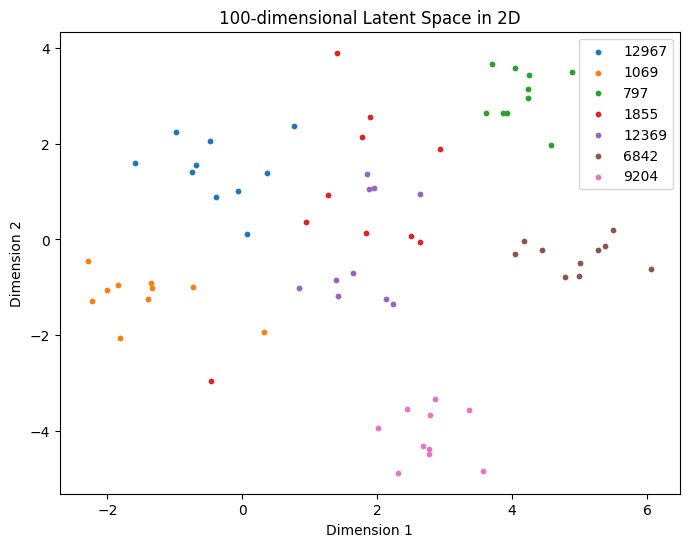

In [5]:
plot_latent_space(
    model=get_model(ckpt_path = "/Users/clemens/PycharmProjects/cvp2/logs/simple-res-vae-original-reconstruction/ovodj9wy/checkpoints/epoch=9-step=36360.ckpt"),
    dataset=dataset
)

No loss function provided. Maybe it is integrated as part of the architecture.


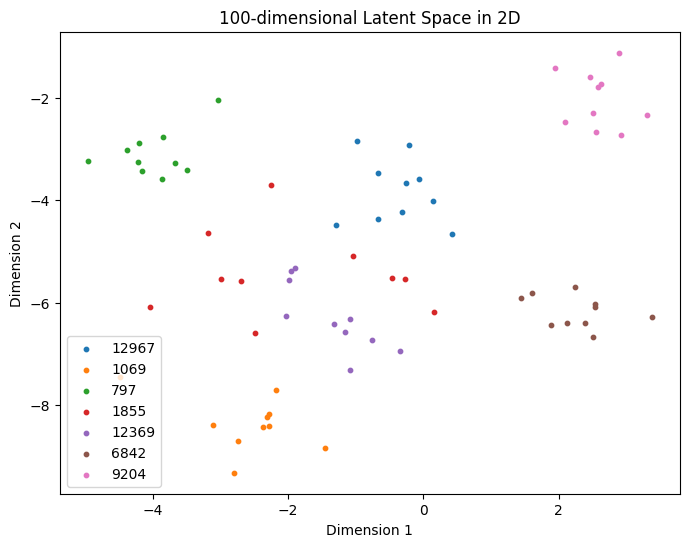

In [6]:
plot_latent_space(
    model=get_model(ckpt_path = "/Users/clemens/PycharmProjects/cvp2/logs/simple-res-vae-original-reconstruction/ovodj9wy/checkpoints/epoch=99-step=363600.ckpt"),
    dataset=dataset
)

## Plots for the self reconstruction

No loss function provided. Maybe it is integrated as part of the architecture.


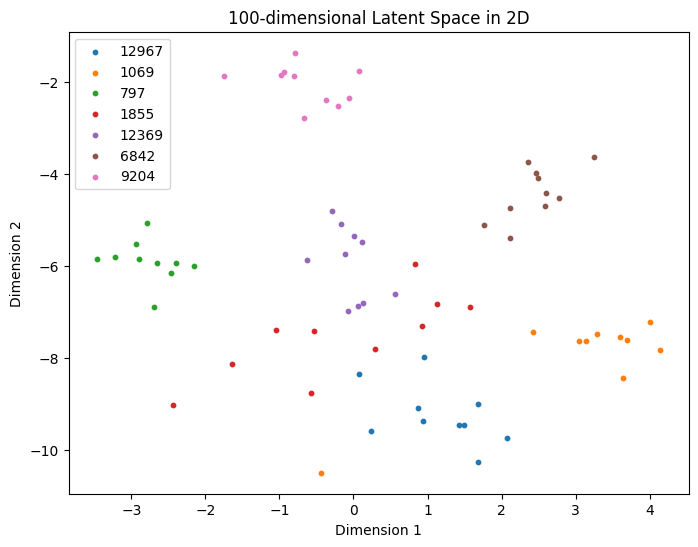

In [7]:
plot_latent_space(
    model=get_model(ckpt_path = "/Users/clemens/PycharmProjects/cvp2/logs/simple-res-vae-self-reconstruction/wkl1jq6b/checkpoints/epoch=9-step=36360.ckpt"),
    dataset=dataset
)

No loss function provided. Maybe it is integrated as part of the architecture.


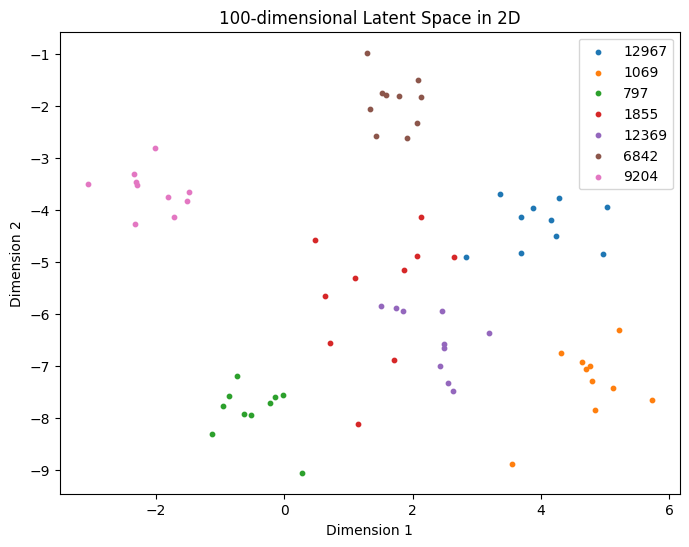

In [9]:
plot_latent_space(
    model=get_model(ckpt_path = "/Users/clemens/PycharmProjects/cvp2/logs/simple-res-vae-self-reconstruction/wkl1jq6b/checkpoints/epoch=99-step=363600.ckpt"),
    dataset=dataset
)